<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [263]:
import sys
sys.path.append("Distribution_Regression_Streams/")
from importlib import reload
import numpy as np
import data_generators.graphs
from data_generators import graphs
import utils
from utils import *
import GP_models as GP_models
from GP_models import GP_classic as GP_naive
from GP_models import GP_sig_precomputed as GP_sig
import experiments
from experiments import * 
import signature_features
from signature_features import *

In [474]:
reload(graphs)
N_bags =50
N_items=15
length = 100
T = 10
t_span = T*np.random.rand(length)
G = 3

example = graphs.Graph()
example.generate_data(N_bags=N_bags, N_items=N_items,G =G,t_span=t_span)


In [475]:
example.get_ratio()

In [476]:
print(example.paths.shape)

(50, 15, 100, 3)


In [477]:
reload(utils)
data_scaled, y_scaled, train_indices, test_indices = utils.split_standardize(example.labels,example.paths,standardized=True,method='standard')

(array([5., 4., 6., 6., 7., 4., 4., 4., 3., 7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

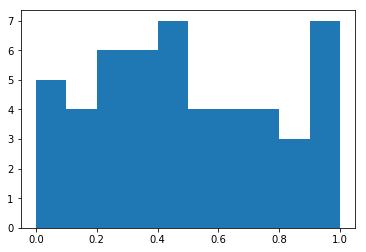

In [465]:
plt.hist(y_scaled)

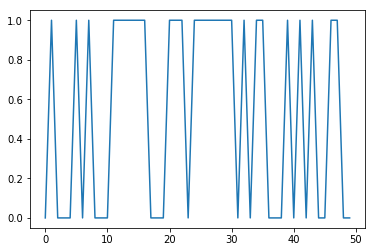

In [466]:
plt.plot(example.paths[0][0][:,0])
plt.show()

maxi 250.0


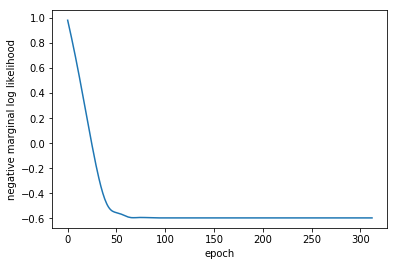

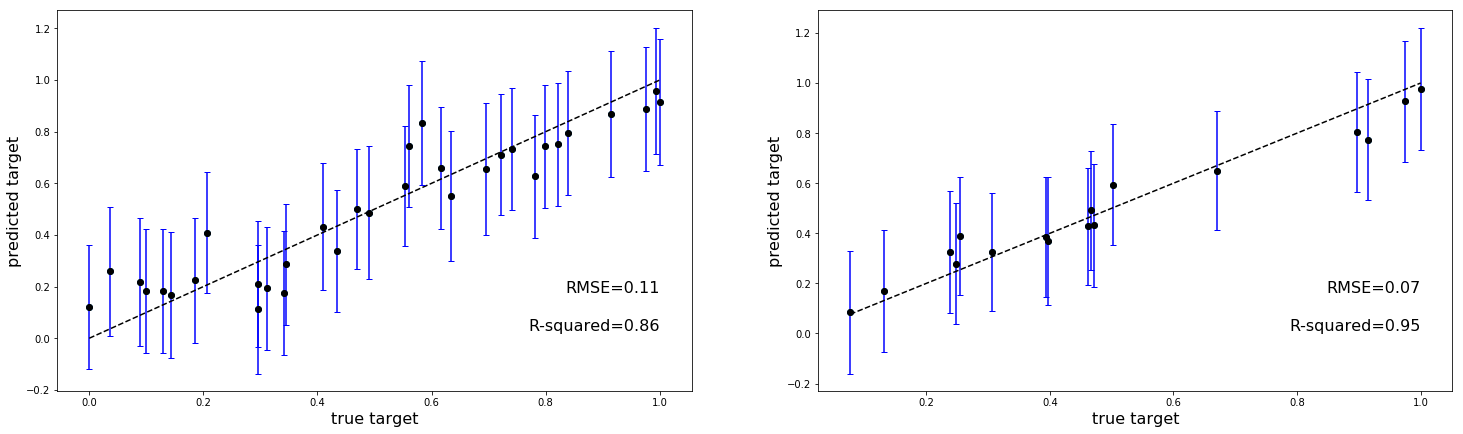

0.9484882574322728


In [467]:
  # # specs for expected sig 
reload(signature_features)
reload(experiments)
reload(GP_sig)
sig_level1 = 1
M = 125

results = []



# pathwise expected sig  
#expected_pathwise_sig, bef, aft= signature_features.scaled_expected_sig([e.copy() for e in data_scaled],sig_level1,M=M,a=1,ilya_rescale=True,return_norms=True)
expected_pathwise_sig = signature_features.scaled_expected_sig([e.copy() for e in data_scaled],sig_level1,M=M,a=1,ilya_rescale=False)

features = expected_pathwise_sig

scaler = StandardScaler()
to_fit = [features[i] for i in train_indices]
scaler.fit(to_fit)
features = scaler.transform(features)



K_precomputed = experiments.precompute_K(features)
RMSE_train, R2_train, RMSE_test, R2_test = experiments.experiment_precomputed(K_precomputed, y_scaled,train_indices,test_indices, param_init=[-0.5,2,0],RBF=False,plot=True)
results.append(R2_test)

print(np.mean(results))
      

(50, 49, 12)
maxi 20.0
(50, 156)


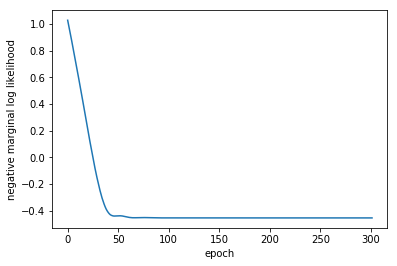

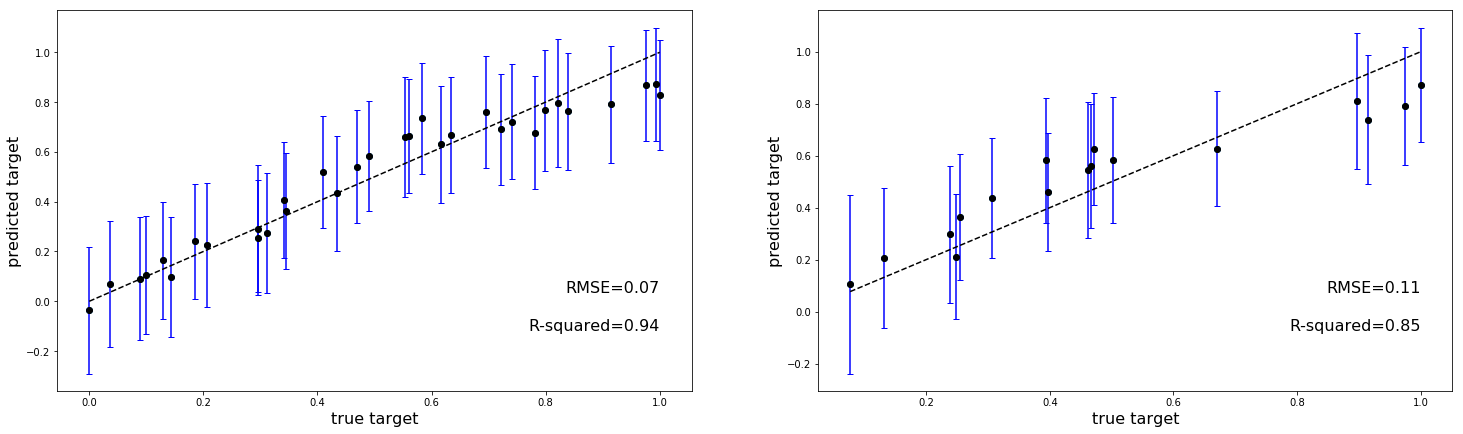

0.8462260831105018


In [468]:
# specs for pathwise expected sig
reload(signature_features)
reload(experiments)
reload(GP_sig)
sig_level1 = 2
M1 = 10
M2 = 10
window = 0

# specs for signature
sig_level2 = 2


results = []


# pathwise expected sig  
expected_pathwise_sig = signature_features.scaled_pathwise_expected_iisignature([e.copy() for e in data_scaled],sig_level1,M=M1,a=1,ilya_rescale=True,return_norms=False)
# final features 
#signatures = signatory.signature(torch.tensor(expected_pathwise_sig),sig_level2)
print(expected_pathwise_sig.shape)
signatures = signature_features.scale_path_ilya(expected_pathwise_sig,sig_level2,M=M2,a=1, return_norms=False)
print(signatures.shape)
K_precomputed = experiments.precompute_K(signatures)
RMSE_train, R2_train, RMSE_test, R2_test = experiments.experiment_precomputed(K_precomputed, y_scaled,train_indices,test_indices, param_init=[0,0,0],RBF=False,plot=True)
results.append(R2_test)

print(np.mean(results))
      

In [219]:
A = np.arange(3,28).reshape(5,5)
print(A)

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]


In [224]:
A[np.triu_indices_from(A, k=1)]

array([ 4,  5,  6,  7, 10, 11, 12, 16, 17, 22])

In [244]:
plt.plot(example.paths[0][0][:,1]

(400, 6)

(50, 15, 100, 3)
(50, 15, 300)


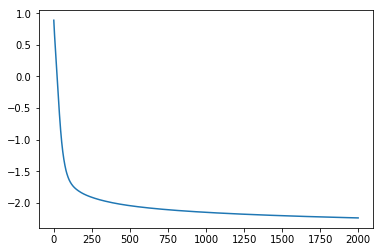

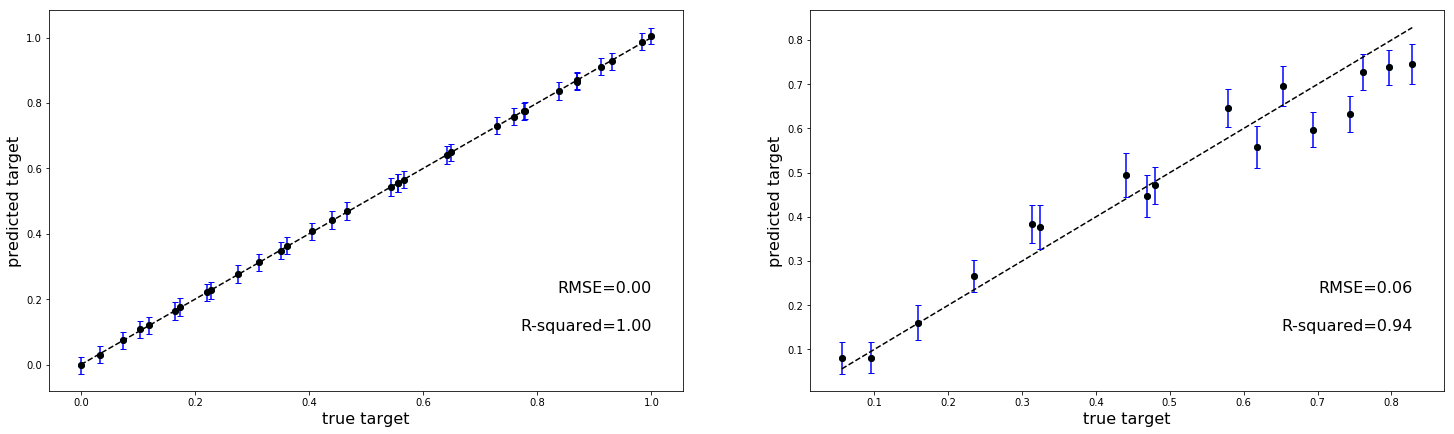

0.9449947580666768


In [478]:
reload(GP_naive)
reload(experiments)
res = []


# stack dimensions
N = np.array(data_scaled).shape[3]
print(np.array(data_scaled).shape)
input_ = np.concatenate([np.array(np.array(data_scaled)[:,:,:,k]) for k in range(N)],axis=2)

print(input_.shape)
RMSE_train, R2_train, RMSE_test, R2_test,_ = experiments.naive_experiment(input_, y_scaled ,train_indices,test_indices,param_init=[10,0,0],plot=True,ARD=True)
res.append(R2_test)

print(np.mean(res))
